<a href="https://colab.research.google.com/github/pythagoras58/qip_convex_hull_QSC/blob/main/VCPQSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U qiskit
!pip install qiskit-aer
!pip install pylatexenc
!pip install pdflatex

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=90a4296a877d6fbd9430a3aef736a3e3fb533181b58af7755539022dd7f20643
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
  Attempting uninstall: attrs
  

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble, transpile
from qiskit.circuit.library import QFT
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_state_qsphere, plot_bloch_multivector, plot_state_city
from qiskit.quantum_info import Statevector
from scipy.stats import norm
import matplotlib.pyplot as plt

Bob's input is greater than or equal to Alice's


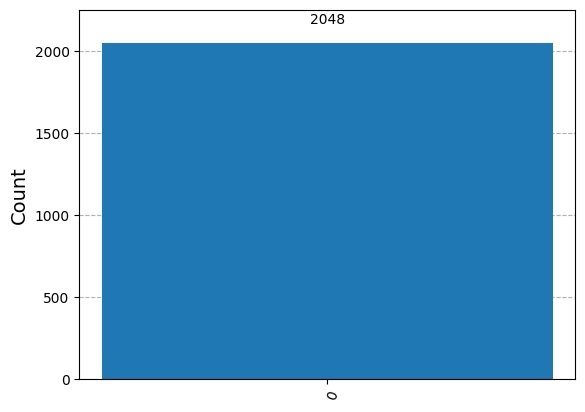

In [ ]:


def create_quantum_commitment(input_value):
    qc = QuantumCircuit(1) #removed the classical bit.
    if input_value == 1:
        qc.x(0)
    return qc

def create_comparison_circuit(qc, alice_qubit, bob_qubit, result_qubit):
    # Example comparison: Alice > Bob
    qc.cx(alice_qubit, result_qubit)
    qc.cx(bob_qubit, result_qubit)
    qc.x(result_qubit)

simulator = AerSimulator()
input_Alice = 1
input_Bob = 0

qc_Alice = create_quantum_commitment(input_Alice)
qc_Bob = create_quantum_commitment(input_Bob)

qc = QuantumCircuit(3, 1)  # 3 qubits, 1 classical bit for comparison result
qc.append(qc_Alice, [0])
qc.append(qc_Bob, [1])

create_comparison_circuit(qc, 0, 1, 2) #alice qubit, bob qubit, comparison result qubit

qc.measure(2, 0) #Measure the comparison result.

"""
transpiled_circuit = transpile(circuit, simulator)
    result = simulator.run(transpiled_circuit, shots=num_shots).result()
    counts = result.get_counts()

    tqc = transpile(qc, simulator)
qobj = assemble(tqc)
result = simulator.run(qobj).result()
"""

tqc = transpile(qc, simulator)
result = simulator.run(tqc, shots=2048).result()
counts = result.get_counts()

if '1' in counts:
    print("Alice's input is greater than Bob's")
else:
    print("Bob's input is greater than or equal to Alice's")

qc.draw('mpl')
plot_histogram(counts)

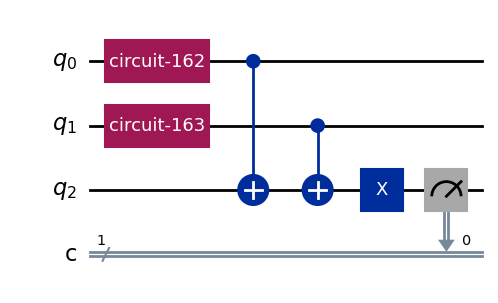

In [ ]:
qc.draw('mpl')

Alice's Commitment Circuit:
   ┌───┐
q: ┤ X ├
   └───┘

Bob's Commitment Circuit:
   
q: 
   

Combined Circuit:
     ┌─────────────┐                  
q_0: ┤ circuit-170 ├──■───────────────
     ├─────────────┤  │               
q_1: ┤ circuit-171 ├──┼────■──────────
     └─────────────┘┌─┴─┐┌─┴─┐┌───┐┌─┐
q_2: ───────────────┤ X ├┤ X ├┤ X ├┤M├
                    └───┘└───┘└───┘└╥┘
c: 1/═══════════════════════════════╩═
                                    0 

Statevector Visualization (Before Measurement):

Bob's input is greater than or equal to Alice's


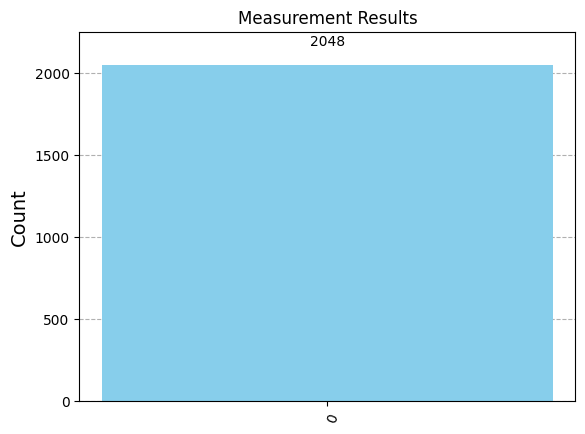

In [ ]:


def create_quantum_commitment(input_value):
    qc = QuantumCircuit(1)
    if input_value == 1:
        qc.x(0)
    return qc

def create_comparison_circuit(qc, alice_qubit, bob_qubit, result_qubit):
    qc.cx(alice_qubit, result_qubit)
    qc.cx(bob_qubit, result_qubit)
    qc.x(result_qubit)

simulator = AerSimulator()
input_Alice = 1
input_Bob = 0

qc_Alice = create_quantum_commitment(input_Alice)
qc_Bob = create_quantum_commitment(input_Bob)

qc = QuantumCircuit(3, 1)
qc.append(qc_Alice, [0])
qc.append(qc_Bob, [1])
create_comparison_circuit(qc, 0, 1, 2)
qc.measure(2, 0)

# Visualize Individual Commitment Circuits
print("Alice's Commitment Circuit:")
print(qc_Alice.draw('text'))
print("\nBob's Commitment Circuit:")
print(qc_Bob.draw('text'))

# Visualize the Combined Circuit
print("\nCombined Circuit:")
print(qc.draw('text'))

# Simulate and Get Statevector Before Measurement
simulator_statevector = AerSimulator(method='statevector')
qc.save_statevector() #save the statevector.
tqc_statevector = transpile(qc, simulator_statevector)
result_statevector = simulator_statevector.run(tqc_statevector).result()
statevector = result_statevector.get_statevector()

# Visualize Statevector
print("\nStatevector Visualization (Before Measurement):")
plot_state_city(statevector)

# Simulate and Get Counts After Measurement
tqc = transpile(qc, simulator)
result = simulator.run(tqc, shots=2048).result()
counts = result.get_counts()

if '1' in counts:
    print("\nAlice's input is greater than Bob's")
else:
    print("\nBob's input is greater than or equal to Alice's")

# Enhanced Histogram Visualization
plot_histogram(counts, title="Measurement Results", color='skyblue')

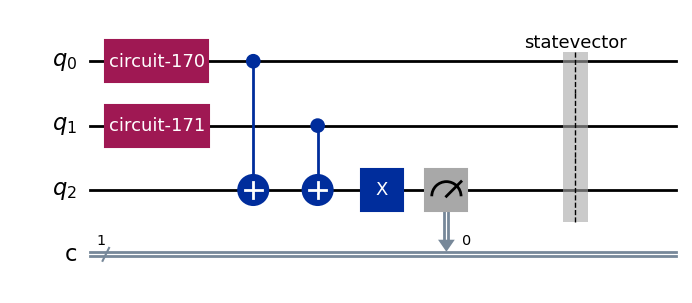

In [ ]:
qc.draw('mpl')

# Complexity Checker

In [ ]:
counts = qc.count_ops()
print(counts)

OrderedDict([('cx', 2), ('circuit-170', 1), ('circuit-171', 1), ('x', 1), ('measure', 1), ('save_statevector', 1)])


In [ ]:
depth = qc.depth()
print(f"Circuit Depth: {depth}")

Circuit Depth: 5


In [ ]:
num_qubits = qc.num_qubits
print(f"Number of Qubits: {num_qubits}")

Number of Qubits: 3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# ***For Convex Hull***

Step 1: Comparison Function
We will create a comparison function for comparing values securely. In practice, secure comparison would require cryptographic techniques (e.g., using homomorphic encryption), but for simplicity, we'll define the logic here as a basic comparison function:

In [ ]:
# Function to perform Value Comparison Protocol (VCPQSC)
def vcpqsc(value_A, value_B):
    """Value Comparison Protocol for extreme points, cosine values, and distances."""
    if value_A > value_B:
        return 1  # A is greater
    elif value_A < value_B:
        return -1  # B is greater
    else:
        return 0  # They are equal



Step 2: Extreme Point Comparison

In [ ]:
# Step 2: Extreme Point Comparison
def compare_extreme_points(points_A, points_B):
    """Compare the extreme points (p_A_min and q_B_min)."""
    # Find the minimum points by x-coordinate
    p_A_min = points_A[np.argmin(points_A[:, 0])]  # Minimum by x-coordinate
    q_B_min = points_B[np.argmin(points_B[:, 0])]  # Minimum by x-coordinate

    comparison_result = vcpqsc(p_A_min[0], q_B_min[0])  # Compare based on x-coordinate

    if comparison_result > 0:  # p_A_min > q_B_min
        v_0 = q_B_min
        v_1 = q_B_min
        extreme_point = q_B_min
    elif comparison_result < 0:  # p_A_min < q_B_min
        v_0 = p_A_min
        v_1 = p_A_min
        extreme_point = p_A_min
    else:  # p_A_min == q_B_min
        v_0 = p_A_min
        v_1 = q_B_min
        extreme_point = (p_A_min, q_B_min)

    return v_0, v_1, extreme_point


Step 3: Cosine Value Comparison

In [ ]:
# Step 3: Cosine Value Comparison
def compute_cosine(v1, v2):
  dot_product = np.dot(v1.flatten(), v2.flatten()) # Flatten the arrays to 1D before calculating the dot product
  norm_v1 = np.linalg.norm(v1)
  norm_v2 = np.linalg.norm(v2)
  return dot_product / (norm_v1 * norm_v2)


def compare_cosines(cos_A, cos_B):
    """Compare the cosine values (cos_A and cos_B)."""
    comparison_result = vcpqsc(cos_A, cos_B)

    if comparison_result > 0:  # cos_A > cos_B
        return 'A', cos_A
    elif comparison_result < 0:  # cos_A < cos_B
        return 'B', cos_B
    else:  # cos_A == cos_B
        return 'Tie', None


Step 4: Distance Comparison

In [ ]:
# Step 4: Distance Comparison
def compute_distance(point, reference):
    """Compute the Euclidean distance between a point and a reference point."""
    return np.linalg.norm(np.array(point) - np.array(reference))

def compare_distances(dis_A, dis_B):
    """Compare the distances (dis_A and dis_B)."""
    comparison_result = vcpqsc(dis_A, dis_B)

    if comparison_result > 0:  # dis_A > dis_B
        return 'A', dis_A
    elif comparison_result < 0:  # dis_A < dis_B
        return 'B', dis_B
    else:  # dis_A == dis_B
        return 'Tie', None



Step 5: Iterative Refinement

In [ ]:

# Step 5: Iterative Refinement and Termination
def refine_convex_hull(points_A, points_B):
    """Iterative refinement to compute the convex hull."""
    convex_hull_A = []
    convex_hull_B = []

    # Initial extreme points based on minimum x-coordinate
    p_A_min = points_A[np.argmin(points_A[:, 0])]  # Minimum by x-coordinate
    q_B_min = points_B[np.argmin(points_B[:, 0])]  # Minimum by x-coordinate

    v_0, v_1, extreme_point = compare_extreme_points(points_A, points_B)
    convex_hull_A.append(v_0)
    convex_hull_B.append(v_1)

    # Step 3: Cosine comparison
    cos_A = compute_cosine(np.array([v_0]), np.array([extreme_point]))
    cos_B = compute_cosine(np.array([v_1]), np.array([extreme_point]))

    winner, best_cos = compare_cosines(cos_A, cos_B)
    if winner == 'A':
        convex_hull_A.append(v_0)  # Append the point, not the cosine value
    elif winner == 'B':
        convex_hull_B.append(v_1)  # Append the point, not the cosine value

    # Step 4: Distance comparison
    # Use the last added points to compute distances
    dis_A = compute_distance(convex_hull_A[-1], p_A_min)
    dis_B = compute_distance(convex_hull_B[-1], q_B_min)

    winner, best_distance = compare_distances(dis_A, dis_B)
    if winner == 'A':
        convex_hull_A.append(v_0) # Append the point, not the distance value
    elif winner == 'B':
        convex_hull_B.append(v_1) # Append the point, not the distance value

    # Convert to NumPy arrays and extract x, y coordinates
    convex_hull_A = np.array(convex_hull_A)
    convex_hull_B = np.array(convex_hull_B)

    # Return x and y coordinates separately to ensure correct plotting
    return convex_hull_A[:, 0], convex_hull_A[:, 1]


Test

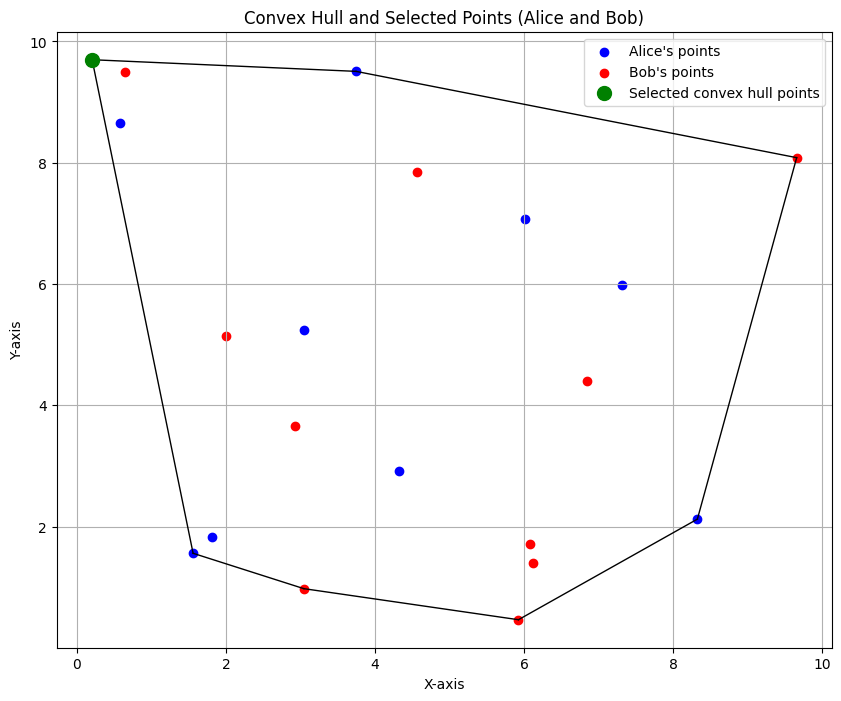

In [ ]:

# Generate some sample points for Alice and Bob
np.random.seed(42)
points_A = np.random.rand(10, 2) * 10  # 10 random points for Alice in 2D space
points_B = np.random.rand(10, 2) * 10  # 10 random points for Bob in 2D space

# Run the refinement protocol to select convex hull points
convex_hull_A, convex_hull_B = refine_convex_hull(points_A, points_B)

# Plotting the results
def plot_convex_hull(points_A, points_B, convex_hull_A, convex_hull_B):
    """Plot Alice's and Bob's points, and their respective convex hulls."""
    # Combine both sets of points to compute a combined convex hull
    combined_points = np.vstack((points_A, points_B))

    # Compute the convex hull of the combined points
    combined_hull = ConvexHull(combined_points)

    # Plot the points
    plt.figure(figsize=(10, 8))
    plt.scatter(points_A[:, 0], points_A[:, 1], color='blue', label="Alice's points")
    plt.scatter(points_B[:, 0], points_B[:, 1], color='red', label="Bob's points")

    # Plot the convex hull for combined points
    for simplex in combined_hull.simplices:
        plt.plot(combined_points[simplex, 0], combined_points[simplex, 1], 'k-', lw=1)

    # Highlight the convex hull points for Alice and Bob
    plt.scatter(convex_hull_A, convex_hull_B, color='green', label="Selected convex hull points", s=100, zorder=5)

    plt.title("Convex Hull and Selected Points (Alice and Bob)")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Call the plotting function
plot_convex_hull(points_A, points_B, convex_hull_A, convex_hull_B)
